In [41]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

import optuna

### Carregar dados

In [3]:
df_laptops = pd.read_csv("./datasets/data.csv")
df_laptops

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1


In [4]:
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,SSD,256,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1


### EDA

In [5]:
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [6]:
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [7]:
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)

In [8]:
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

In [9]:
# Distribuição Brand
percentual_brand = df_laptops.value_counts('brand') / len(df_laptops) * 100
px.bar(percentual_brand, color=percentual_brand.index)

In [10]:
# Distribuição da variável processor_brand
percentual_processor_brand = df_laptops.value_counts('processor_brand') / len(df_laptops) * 100
px.bar(percentual_processor_brand, color=percentual_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

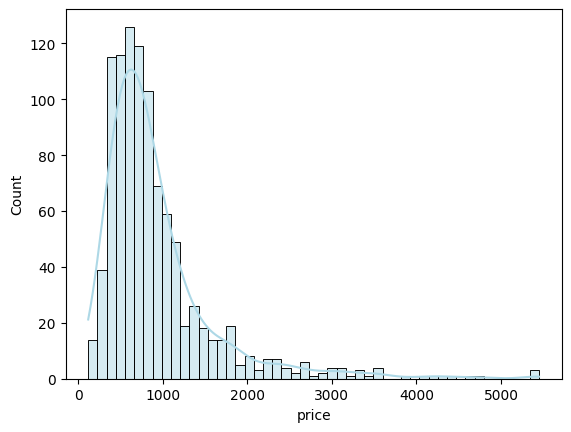

In [11]:
# Dist price
sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

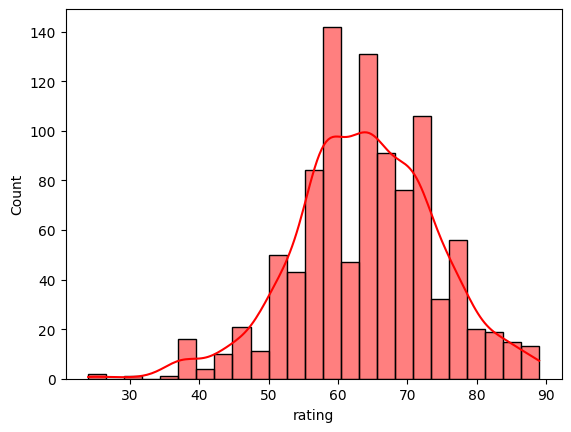

In [12]:
# Dist rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [13]:
# Plot de dist boxplot por brand e price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h')

In [14]:
# Plot de dist boxplot por brand e rating
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h')

In [15]:
#Scatter price e rating
px.scatter(df_laptops, x='price', y='rating', color='brand')

### Treinar modelos clustering hierárquico

In [16]:
# Selecionar as colunas para clusterização
X = df_laptops.copy()

# Remover colunas desnecessárias
X.drop(columns=['index', 'model'], axis=1, inplace=True)

In [17]:
X

,brand,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,tecno,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,0,15.6,1920,1080,windows,1
1,tecno,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,0,15.6,1920,1080,windows,1
2,hp,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,0,15.6,1920,1080,windows,1
3,acer,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,0,14.0,1920,1080,windows,1
4,lenovo,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,asus,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,1
987,msi,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,2
988,asus,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
989,asus,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,0,14.0,2560,1600,windows,1


In [18]:
# Separando numericas e categorias
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity', 'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_brand', 'os']

In [19]:
# aplicar transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [20]:
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
  ]
)

In [21]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [22]:
X_transformed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13874 stored elements and shape (991, 56)>

In [23]:
def hierarchical_aglomerative_objective(trial):
  n_clusters = trial.suggest_int('n_clusters', 10, 150)

  # Linkage = critério de distância entre dois conjuntos para formar os clusters
  # wards = Variância
  # average = media
  # complete = máxima
  # single = minima
  linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])

  hierarchical_model = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)

  y = hierarchical_model.fit_predict(X_transformed.toarray())

  # silhouette score
  silhouette_avg = silhouette_score(X_transformed, y)

  return silhouette_avg

In [24]:
# Criar estudo no optuna
search_space_ag = {'n_clusters': range(10, 151), 'linkage': ['ward', 'average', 'complete', 'single']}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
estudo_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2024-08-05 17:30:36,602] A new study created in memory with name: no-name-ba743d1e-cef2-4a79-85ea-4ff685b0615e


In [25]:
estudo_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2024-08-05 17:30:36,663] Trial 0 finished with value: 0.17175292696425382 and parameters: {'n_clusters': 45, 'linkage': 'complete'}. Best is trial 0 with value: 0.17175292696425382.
[I 2024-08-05 17:30:36,712] Trial 1 finished with value: 0.1388225930658535 and parameters: {'n_clusters': 22, 'linkage': 'average'}. Best is trial 0 with value: 0.17175292696425382.
[I 2024-08-05 17:30:36,761] Trial 2 finished with value: 0.1948455701908811 and parameters: {'n_clusters': 31, 'linkage': 'ward'}. Best is trial 2 with value: 0.1948455701908811.
[I 2024-08-05 17:30:36,808] Trial 3 finished with value: 0.21677204620028326 and parameters: {'n_clusters': 89, 'linkage': 'average'}. Best is trial 3 with value: 0.21677204620028326.
[I 2024-08-05 17:30:36,857] Trial 4 finished with value: 0.16623360556626884 and parameters: {'n_clusters': 61, 'linkage': 'average'}. Best is trial 3 with value: 0.21677204620028326.
[I 2024-08-05 17:30:36,905] Trial 5 finished with value: 0.18846247076521289 and para

In [26]:
best_param_ag = estudo_ag.best_params
print(f'Clusters = {best_param_ag['n_clusters']}')
print(f'Linkage = {best_param_ag['linkage']}')

Clusters = 149
Linkage = ward


In [27]:
best_param_ag

{'n_clusters': 149, 'linkage': 'ward'}

In [28]:
def hierarchical_divisive_objective(trial):
  n_clusters = trial.suggest_int('n_clusters', 10, 150)

  hierarchical_model = BisectingKMeans(n_clusters=n_clusters)

  y = hierarchical_model.fit_predict(X_transformed.toarray())

  # silhouette score
  silhouette_avg = silhouette_score(X_transformed, y)

  return silhouette_avg

In [29]:
# Criar estudo no optuna
search_space_dv = {'n_clusters': range(10, 151)}
sampler_dv = optuna.samplers.GridSampler(search_space=search_space_dv)
estudo_dv = optuna.create_study(direction='maximize', sampler=sampler_dv)

[I 2024-08-05 17:31:46,780] A new study created in memory with name: no-name-d894965c-de2f-47a9-8826-81b7ea4a4952


In [30]:
estudo_dv.optimize(hierarchical_divisive_objective, n_trials=600)

[I 2024-08-05 17:31:47,592] Trial 0 finished with value: 0.21207551417767134 and parameters: {'n_clusters': 146}. Best is trial 0 with value: 0.21207551417767134.
[I 2024-08-05 17:31:47,866] Trial 1 finished with value: 0.15277931044706933 and parameters: {'n_clusters': 50}. Best is trial 0 with value: 0.21207551417767134.
[I 2024-08-05 17:31:47,982] Trial 2 finished with value: 0.1564762198366638 and parameters: {'n_clusters': 15}. Best is trial 0 with value: 0.21207551417767134.
[I 2024-08-05 17:31:48,386] Trial 3 finished with value: 0.18068255749206372 and parameters: {'n_clusters': 83}. Best is trial 0 with value: 0.21207551417767134.
[I 2024-08-05 17:31:48,777] Trial 4 finished with value: 0.1734583581561441 and parameters: {'n_clusters': 81}. Best is trial 0 with value: 0.21207551417767134.
[I 2024-08-05 17:31:49,147] Trial 5 finished with value: 0.16236498638317626 and parameters: {'n_clusters': 74}. Best is trial 0 with value: 0.21207551417767134.
[I 2024-08-05 17:31:49,805] T

In [31]:
best_param_dv = estudo_dv.best_params
print(f'Clusters = {best_param_dv['n_clusters']}')

Clusters = 143


In [32]:
# Criar modelo com melhor parametros
best_model = AgglomerativeClustering(
  n_clusters=best_param_ag['n_clusters'],
  linkage=best_param_ag['linkage']
)

In [33]:
# Treinar modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [34]:
# Verificar silhouette score
best_score = silhouette_score(X_transformed, best_model.labels_)

In [35]:
best_score

np.float64(0.3261052760175957)

In [36]:
# Criar coluna com cluster escolhido no df original
df_laptops['cluster'] = best_model.labels_

### Visualizar resultados

In [37]:
# mostrar chart com trials do optuna
fig = optuna.visualization.plot_optimization_history(estudo_ag)
fig.show()

In [40]:
# Mostrar o dendograma
modelo_de = linkage(X_transformed.toarray(), method=best_param_ag['linkage'], optimal_ordering=True)

Text(0, 0.5, 'Distância')

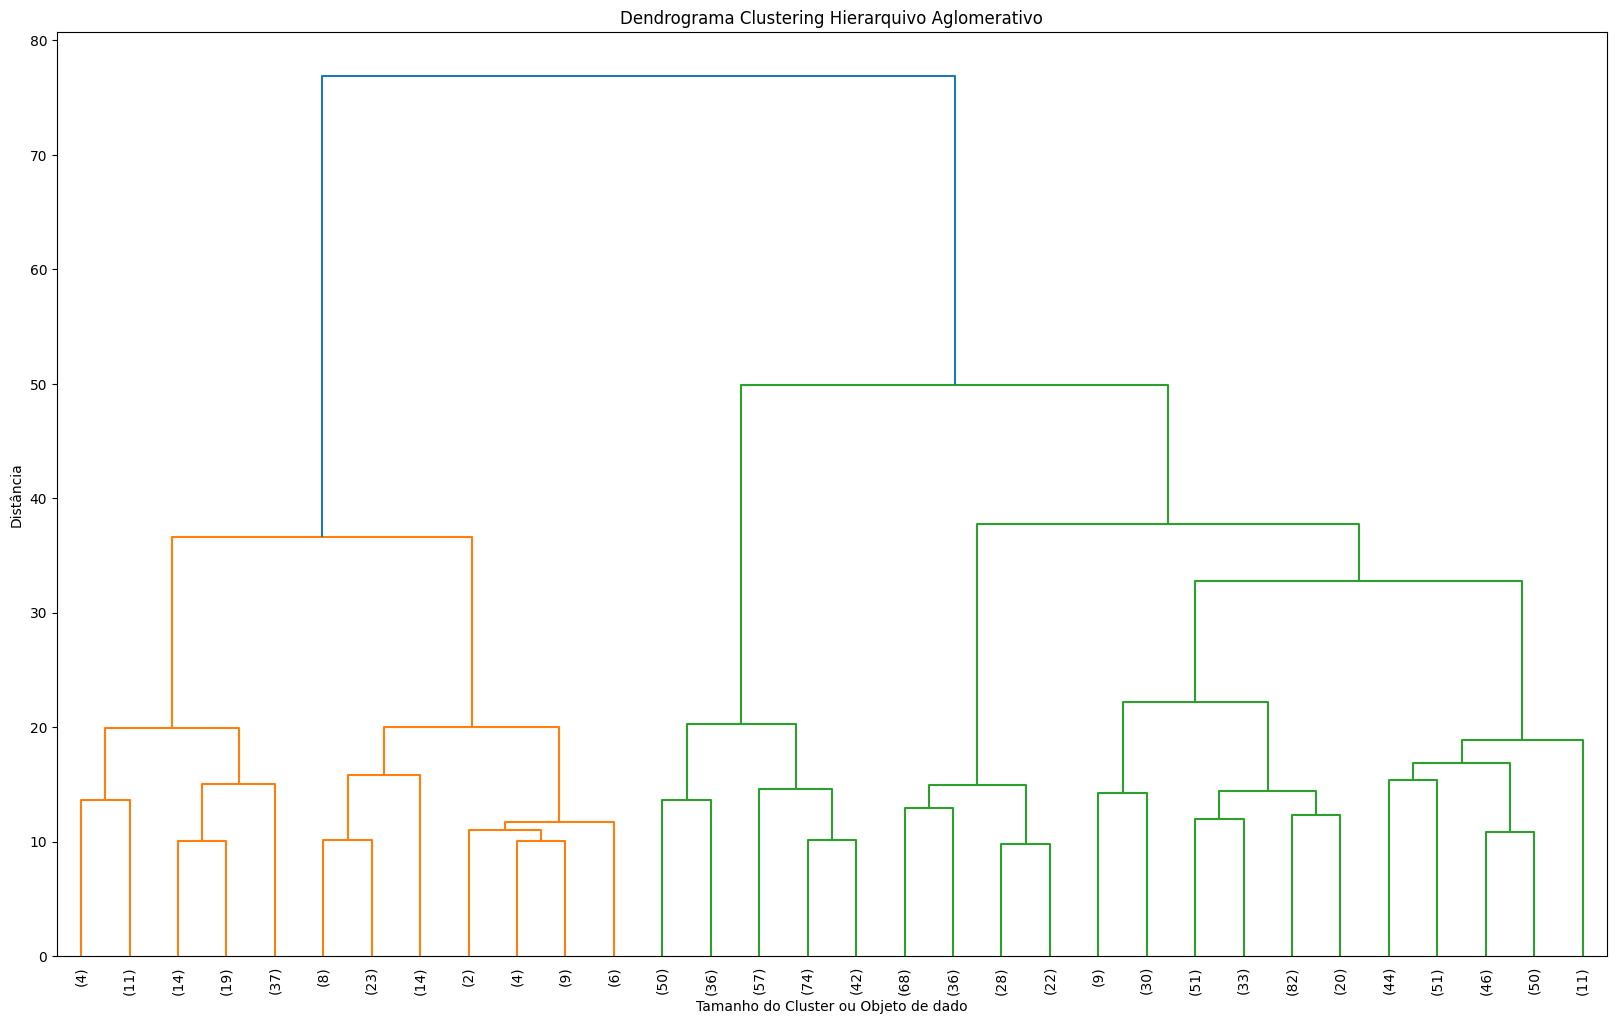

In [51]:
plt.figure(figsize=(20,12))
dendrogram(modelo_de, truncate_mode='lastp', p=32, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma Clustering Hierarquivo Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de dado')
plt.ylabel('Distância')

In [52]:
clusters_de_scipy = cut_tree(modelo_de, height=32)
len(np.unique(clusters_de_scipy))

6

In [58]:
# Cruzamento entre brand e price apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [59]:
# Cruzamento entre brand e price apresentando os clusters
px.scatter(df_laptops, x='cluster', y='price', color='brand')

In [61]:
# Cruzamento entre brand e price apresentando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster')

In [62]:
# Cruzamento entre brand e price apresentando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand')

In [63]:
# Distribuição cluster
percentual_cluster = df_laptops.value_counts('cluster') / len(df_laptops) * 100
px.bar(percentual_cluster, color=percentual_cluster.index)

In [64]:
# Distribuição cluster
qtde_cluster = df_laptops.value_counts('cluster')
px.bar(qtde_cluster, color=qtde_cluster.index)

### Salvar modelo, PreProcessor, CSV Atualizado

In [68]:
import joblib

joblib.dump(best_model, './modelo_cluster_laptops.pkl')
joblib.dump(preprocessor, './preprocesso_cluster_laptops.pkl')

['./preprocesso_cluster_laptops.pkl']

In [69]:
df_laptops.to_csv('./datasets/cluster_laptops.csv', index=False)